In [1]:
#Pyhton library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import numpy as np
import statsmodels.api as sm
import plotly.offline as py
import plotly.express as px

In [2]:
#Loading datasets (Weather, Temperature and Covid19 Cases in 5 cities)

df_italy = pd.read_csv('Weather/data_milan_italy_weather.csv')
df_new_york = pd.read_csv('Weather/data_new-york_weather.csv')
df_SP = pd.read_csv('Weather/data_Sao-Paulo-Brazil_weather.csv')
df_BCN = pd.read_csv('Weather/data_Barcelona-Spain_weather.csv')
df_New_Delhi = pd.read_csv('Weather/data_New-Delhi-india_weather.csv')

In [3]:
#Adding column 'City'

df_italy['City'] = 'Milan'
df_new_york['City'] = 'New York'
df_SP['City'] = 'Sao Paulo'
df_BCN['City'] = 'Barcelona'
df_New_Delhi['City'] = 'New Delhi'

In [4]:
frames = [df_italy, df_new_york, df_SP, df_BCN, df_New_Delhi]
df = pd.concat(frames)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [5]:
df_resume = df.loc[:, ['Cases', 'City', 'Date', 'Hum Avg', 'Temp Avg','CumulativeCases']]
df_resume1 = df_resume[df_resume['Cases'] != 0]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
df1 = df[df['City'] == 'Milan']
df2 = df[df['City'] == 'New York']
df3 = df[df['City'] == 'Sao Paulo']
df4 = df[df['City'] == 'Barcelona']
df5 = df[df['City'] == 'New Delhi']


ax.plot(df1['Date'], df1['Cases'], 'g', label='Cases in Milan')
ax.plot(df2['Date'], df2['Cases'], 'b', label='Cases in New York')
ax.plot(df3['Date'], df3['Cases'], 'k', label='Cases in Sao Paulo')
ax.plot(df4['Date'], df4['Cases'], 'm', label='Cases in Barcelona')
ax.plot(df5['Date'], df5['Cases'], 'c', label='Cases in New Delhi')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

fig.autofmt_xdate()
ax.set_title('Cases')
plt.xlabel("Date")
plt.ylabel("Temperature")

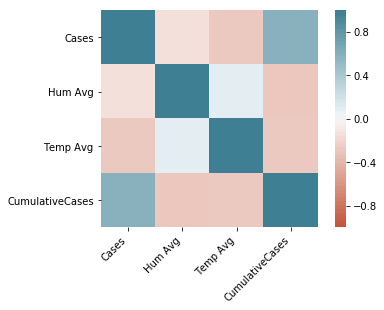

In [6]:
corr = df_resume1.corr()
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [23]:
df_resume1.corr().style.background_gradient('Blues_r', low=.5, high=0)

,Cases,Hum Avg,Temp Avg,CumulativeCases
Cases,1,-0.124196,-0.274402,0.588213
Hum Avg,-0.124196,1,0.0977209,-0.285633
Temp Avg,-0.274402,0.0977209,1,-0.27678
CumulativeCases,0.588213,-0.285633,-0.27678,1


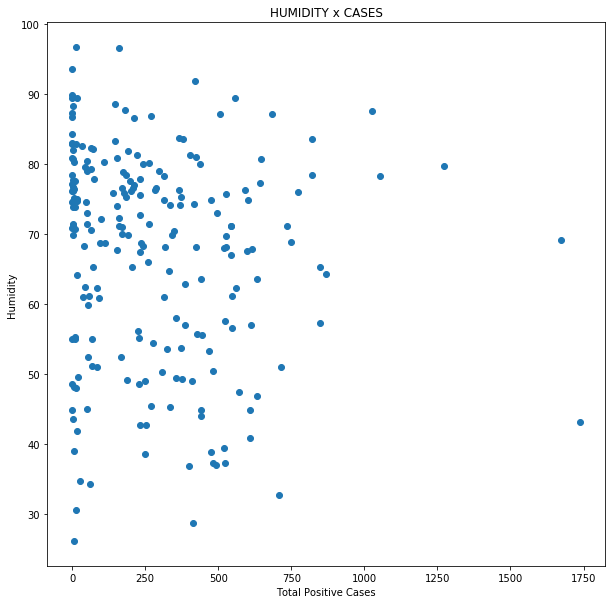

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(df_resume1['Cases'], df_resume1['Hum Avg'])
ax.set_title('HUMIDITY x CASES')
plt.xlabel("Total Positive Cases")
plt.ylabel("Humidity")
plt.savefig('2.png')

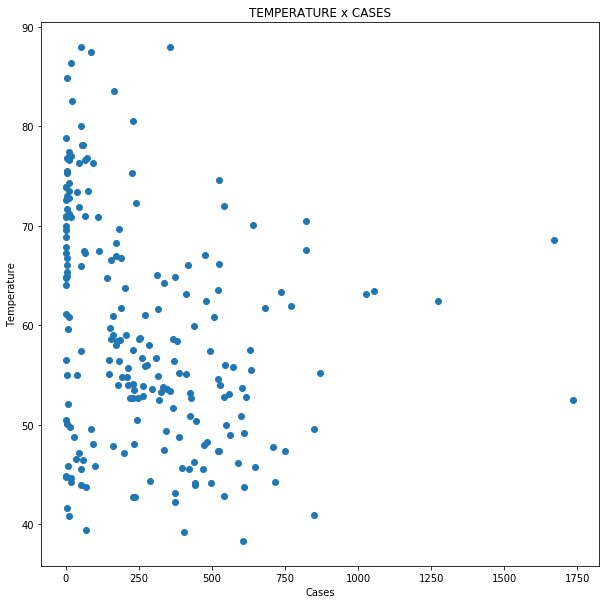

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(df_resume1['Cases'], df_resume1['Temp Avg'])
ax.set_title('TEMPERATURE x CASES')
plt.xlabel("Cases")
plt.ylabel("Temperature")
plt.savefig('3.png')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



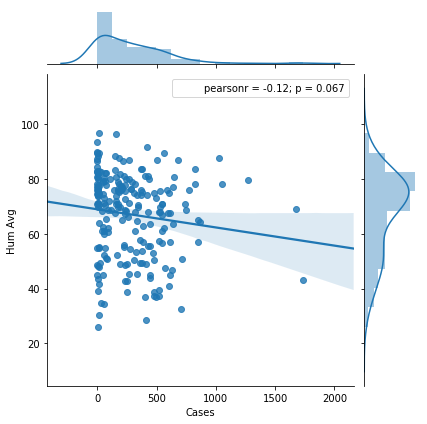

In [18]:
sns.jointplot(df_resume1['Cases'], df_resume1['Hum Avg'], kind = 'reg');
plt.savefig('4.png')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



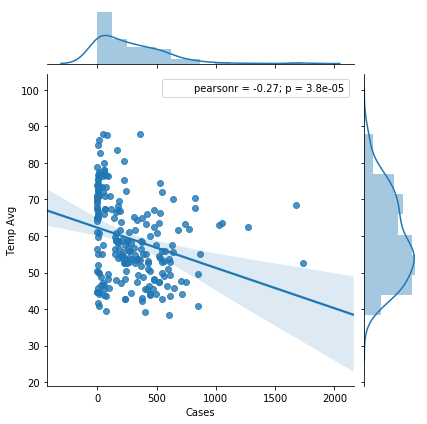

In [19]:
sns.jointplot(df_resume1['Cases'], df_resume1['Temp Avg'], kind = 'reg');
plt.savefig('5.png')